# Import dataset

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

In [88]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [101]:
def basic_data_info(df):
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    display(df.head(15))

In [104]:
pd.set_option('display.max_colwidth', None)
basic_data_info(train)

Number of rows: 891
Number of columns: 14


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs


In [91]:
basic_data_info(test)

Number of rows: 418
Number of columns: 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data exploration

## Features

Survived - 0: No, 1: Yes

In [92]:
for col in train.columns:
    print(col, train[col].nunique(), end=', ')

PassengerId 891, Survived 2, Pclass 3, Name 891, Sex 2, Age 88, SibSp 7, Parch 7, Ticket 681, Fare 248, Cabin 147, Embarked 3, 

In [93]:
# Check for NaN counts in all columns for both train and test datasets
print("NaN counts in train dataset:")
print(train.isna().sum())

print("\nNaN counts in test dataset:")
print(test.isna().sum())

NaN counts in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NaN counts in test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Pclass

In [128]:
def display_correlation(x_name, y_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=x_name, hue=y_name)
    plt.title('Survived vs Not Survived for Each ' + x_name)
    plt.xlabel(x_name)
    plt.ylabel('Count')
    plt.legend(title=y_name, loc='upper right')
    plt.show()

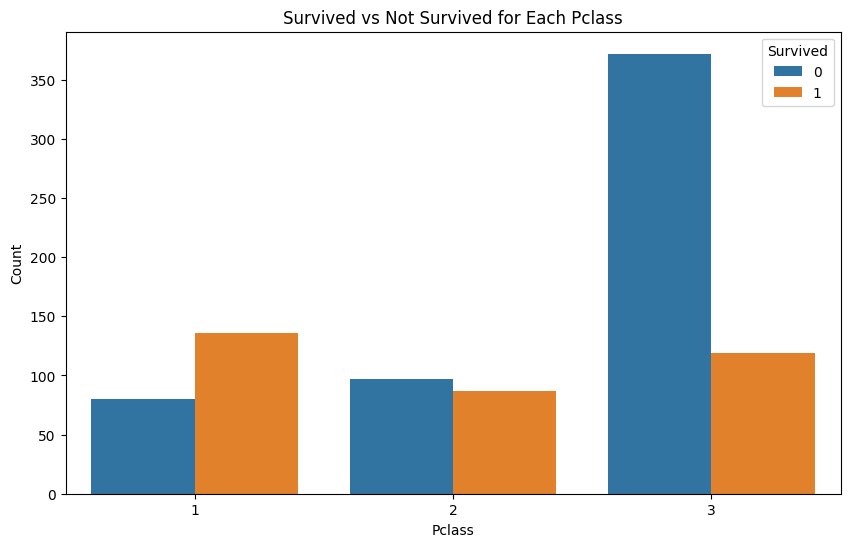

In [129]:
display_correlation('Pclass', 'Survived')

### Name

In [96]:
train['Surname'] = train['Name'].apply(lambda x: x.split(",")[0])
train[['Name', 'Surname']].nunique()

Name       891
Surname    667
dtype: int64

Could look at correlation with families, or use to work out if husband/wife are on board (thus splitting sibsp).

In [117]:
train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(".")[0])
train[['Name', 'Title']].nunique()

Name     891
Title     17
dtype: int64

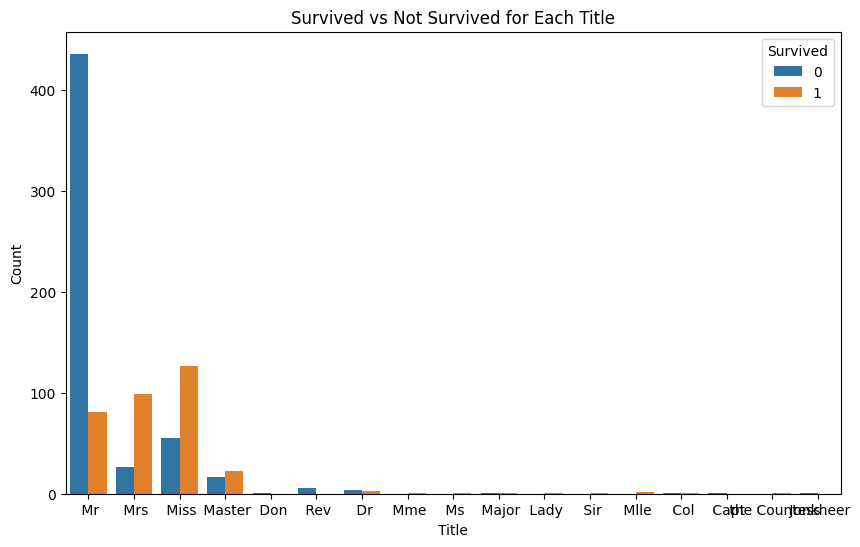

In [131]:
display_correlation('Title', 'Survived')

### Sex

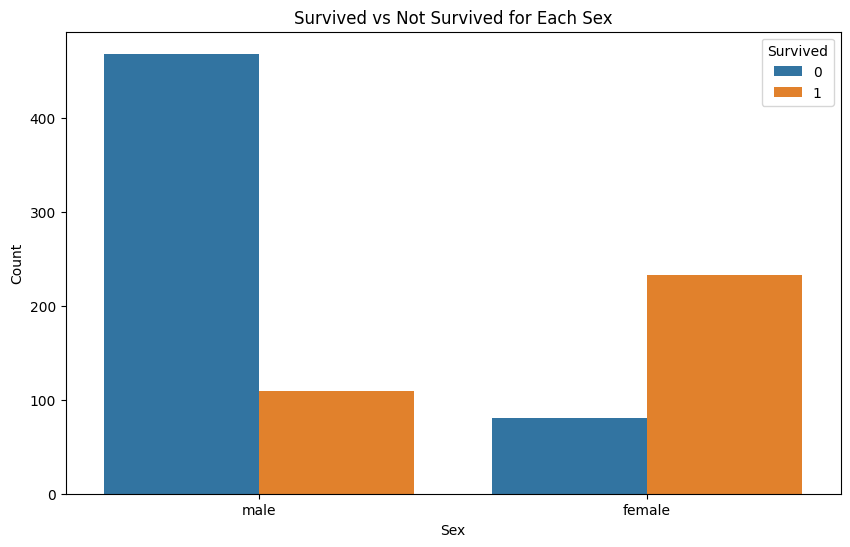

In [119]:
display_correlation('Sex', 'Survived')

### Age

In [135]:
def display_hist(x_name, y_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=x_name, hue=y_name)
    plt.show()

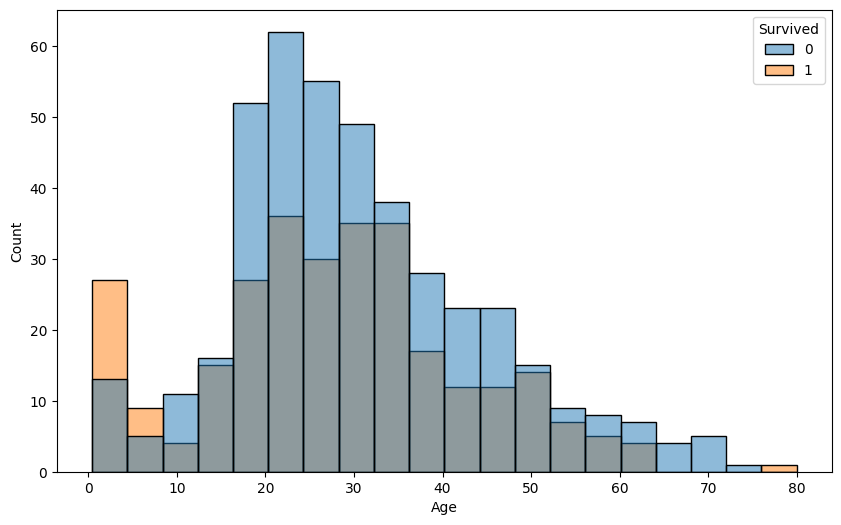

In [136]:
display_hist('Age', 'Survived')

### Cabin

In [53]:
train['Cabin'].isna().sum() + train['Cabin'].nunique()

np.int64(834)

In [115]:
pd.options.display.max_rows = 999
display(train['Cabin'])

0                  NaN
1                  C85
2                  NaN
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [146]:
train['Floor'] = train['Cabin'].astype(str).apply(lambda x: x[0] if x != "nan" else "nan")
train[['Cabin', 'Floor']].nunique()

Cabin    147
Floor      9
dtype: int64

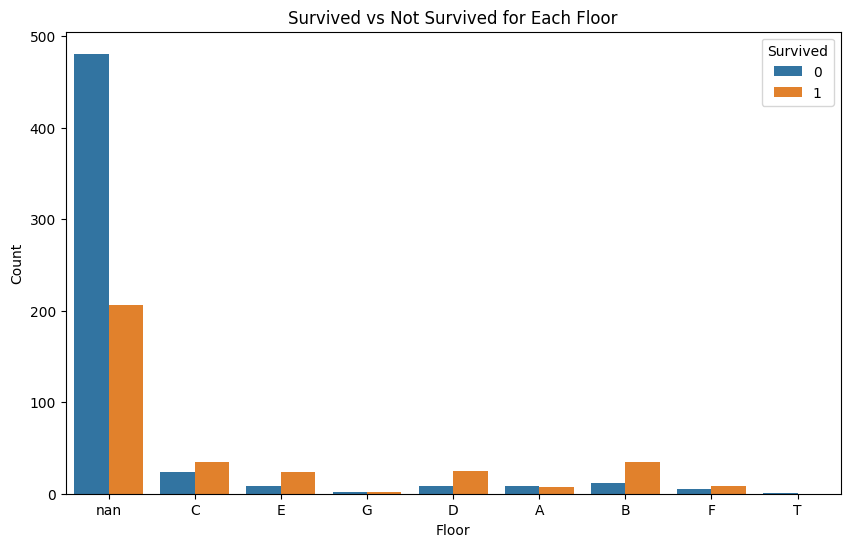

In [147]:
display_correlation('Floor', 'Survived')

# Preprocessing

# Models